<a href="https://colab.research.google.com/github/swopnimghimire-123123/Machine-Learning-Journey/blob/main/24_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
117,15591433,Male,36,52000,0
292,15625395,Male,55,39000,1
101,15593014,Male,28,59000,0
149,15767871,Male,20,74000,0
0,15624510,Male,19,19000,0


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
47,27,54000,0
121,37,72000,0
207,52,114000,0
283,52,21000,1
145,24,89000,0


###**Train and split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.2,random_state=0)

In [ ]:
x_train.sample(5)

,Age,EstimatedSalary
91,30,116000
222,37,144000
129,26,84000
328,36,118000
262,55,125000


In [ ]:
print(x_train.shape)
print(x_test.shape)

(320, 2)
(80, 2)


###**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the train set , it'll learn the parameters
scaler.fit(x_train)

StandardScaler()

In [ ]:
# Transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [ ]:
x_train.sample(3)

,Age,EstimatedSalary
88,26,81000
57,28,79000
190,24,84000


In [ ]:
x_train_scaled.head()

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024


In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


###**Effects of Scaling**

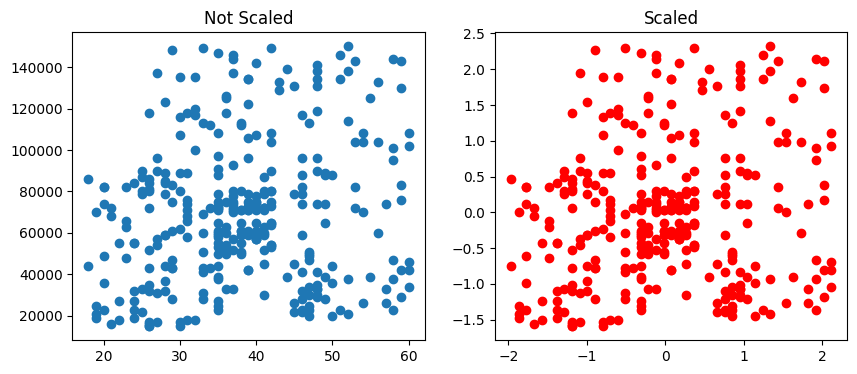

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("Not Scaled")

ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("Scaled")
plt.show()

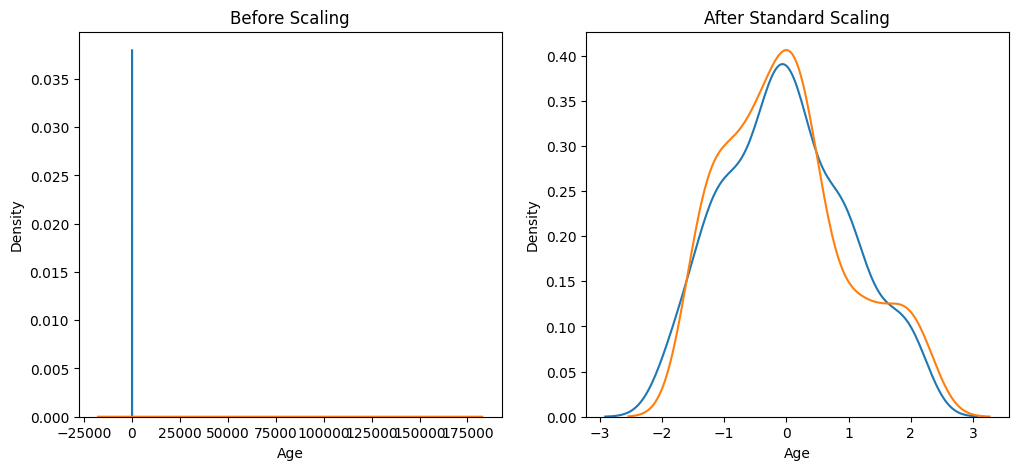

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

###**Comparision of Distribution**

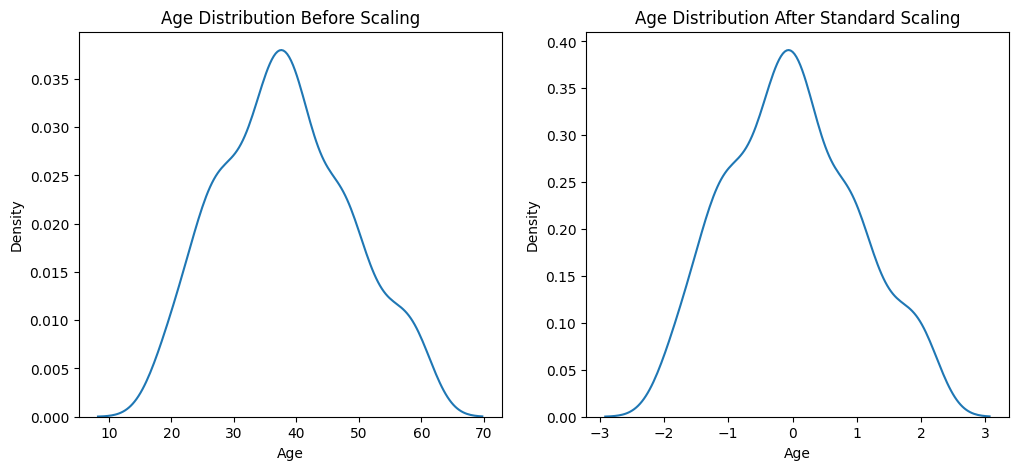

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

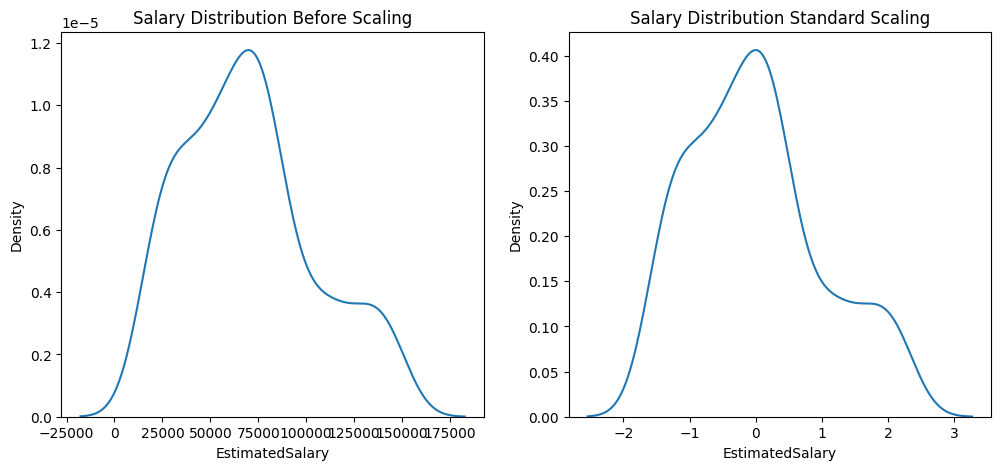

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

###**Why scaling is important?**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.9


###**keep in mind that scaling has no affect on outliers**